In [1]:
##Import packages needed (and some not needed....)

import Bio

import openpyxl
from Bio import SeqIO
import os,sys,re

import pandas as pd
print(pd.__name__, pd.__version__)

import numpy as np
print(np.__name__, np.__version__)

import matplotlib.pyplot as plt
import matplotlib
print(matplotlib.__name__, matplotlib.__version__)
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator

import scipy.stats as stats
import scipy
print(scipy.__name__, scipy.__version__)

import seaborn as sns
print(sns.__name__, sns.__version__)

from collections import Counter
from functools import reduce

import scipy as sp
import math
from scipy.stats import shapiro 
from scipy.stats import lognorm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

pandas 1.5.2
numpy 1.23.5
matplotlib 3.4.1
scipy 1.10.0
seaborn 0.12.2


In [2]:
aa_prop = {
    'A': 'non-polar',
    'R': '+ charge',
    'N': 'polar',
    'D': '- charge',
    'C': 'non-polar',
    'E': '- charge',
    'Q': 'polar',
    'G': 'non-polar',
    'H': '+ charge',
    'I': 'non-polar',
    'L': 'non-polar',
    'K': '+ charge',
    'M': 'non-polar',
    'F': 'non-polar',
    'P': 'non-polar',
    'S': 'polar',
    'T': 'polar',
    'W': 'non-polar',
    'Y': 'polar',
    'V': 'non-polar',
    "*": "stop"
}

In [3]:
#open df with wt positions

WT_annot = pd.read_excel('../wt_aa_annot.xlsx', header=0)

aa_wt1 = pd.melt(WT_annot, id_vars=['aa'])

#keep only WT rows

aa_wt1 = aa_wt1[aa_wt1['value'] == 'o'].reset_index(drop=True)

#make a dictionnary of position + wt aa

aa_dict = dict(zip(aa_wt1['variable'], aa_wt1['aa']))

In [4]:
df_none = pd.read_csv("../Nothing/Select_coeff_p_value_aa_No antifungal_NovaSeq_winter2023_albicans_2023-12-07.csv", header=0)
df_fluco = pd.read_csv("../Fluconazole/Select_coeff_p_value_aa_Fluconazole_NovaSeq_winter2023_albicans_2023-12-06.csv", header=0)
df_itra = pd.read_csv("../Itraconazole/Select_coeff_p_value_aa_Itraconazole_NovaSeq_winter2023_albicans_2023-12-06.csv", header=0)
df_vorico = pd.read_csv("../Voriconazole/Select_coeff_p_value_aa_Voriconazole_NovaSeq_winter2023_albicans_2023-12-06.csv", header=0)
df_posaco = pd.read_csv("../Posaconazole/Select_coeff_p_value_aa_Posaconazole_NovaSeq_winter2023_albicans_2023-12-06.csv", header=0)
df_isa = pd.read_csv("../Isavuconazole/Select_coeff_p_value_aa_Isavuconazole_NovaSeq_winter2023_albicans_2023-12-06.csv", header=0)
df_clotri = pd.read_csv("../Clotrimazole/Select_coeff_p_value_aa_Clotrimazole_NovaSeq_winter2023_albicans_2023-12-06.csv", header=0)

In [6]:
# List of dataframes
df_list = [df_none, df_fluco, df_itra, df_vorico, df_posaco, df_isa, df_clotri]

# Iterate over each dataframe
for df in df_list:
    # Create a new column 'result' based on conditions
    df['result'] = df.apply(lambda row: 'advantageous' if (row['adjusted_p_value'] < 0.01 and row['select_coef'] > 0)
                       else 'deleterious' if (row['adjusted_p_value'] < 0.01 and row['select_coef'] < 0)
                       else 'wt like', axis=1)

In [7]:
All_long = pd.concat([df_none, df_fluco,df_itra,df_vorico,df_posaco,df_isa, df_clotri],axis=0)

#amino acid properties change and percentage in each category

df = All_long

df['aa_prop'] = df['aa'].map(aa_prop)

df['aa_WT'] = df['position'].map(aa_dict)
df['aa_prop_WT'] = df['aa_WT'].map(aa_prop)
df["prop_change"] = df['aa_prop_WT'] + " to " + df['aa_prop']

def compare_columns(row):
    if row['aa_prop_WT'] == '+ charge' and row['aa_prop'] == '- charge':
        return 'Charge change'
    elif row['aa_prop_WT'] == '- charge' and row['aa_prop'] == '+ charge':
        return 'Charge change'
    elif row['aa_prop_WT'] == 'non-polar' and row['aa_prop'] == '+ charge':
        return 'Non-polar to charged'
    elif row['aa_prop_WT'] == 'non-polar' and row['aa_prop'] == '- charge':
        return 'Non-polar to charged'
    elif row['aa_prop_WT'] == 'non-polar' and row['aa_prop'] == 'polar':
        return 'Non-polar to polar'
    elif row['aa_prop_WT'] == 'polar' and row['aa_prop'] == '+ charge':
        return 'Polar to charged'
    elif row['aa_prop_WT'] == 'polar' and row['aa_prop'] == '- charge':
        return 'Polar to charged'
    elif row['aa_prop_WT'] == '+ charge' and row['aa_prop'] == 'polar':
        return 'Charged to polar'
    elif row['aa_prop_WT'] == '- charge' and row['aa_prop'] == 'polar':
        return 'Charged to polar'    
    elif row['aa_prop_WT'] == '+ charge' and row['aa_prop'] == 'non-polar':
        return 'Charged to non-polar'
    elif row['aa_prop_WT'] == '- charge' and row['aa_prop'] == 'non-polar':
        return "Charged to non-polar"
    elif row['aa_prop_WT'] == 'polar' and row['aa_prop'] == 'non-polar':
        return "Polar to non-polar"
    elif row['aa_prop_WT'] == row['aa_prop']:
        return 'No change'
    elif row['aa_prop'] == "stop":
        return "stop"

df['comparison_result'] = df.apply(compare_columns, axis=1)
df.to_csv(f'Long_df_all_antifungals_pval_0.01_2023-07-11.csv')  

df

,Unnamed: 0,position,Antifungal,aa,select_coef,p_value,adjusted_p_value,variant,result,aa_prop,aa_WT,aa_prop_WT,prop_change,comparison_result
0,0,55,None,*,-0.528211,8.240903e-210,8.053801e-209,55*,deleterious,stop,I,non-polar,non-polar to stop,stop
1,1,55,None,A,-0.004103,7.384538e-01,8.869498e-01,55A,wt like,non-polar,I,non-polar,non-polar to non-polar,No change
2,2,55,None,C,-0.009924,3.218775e-01,5.661675e-01,55C,wt like,non-polar,I,non-polar,non-polar to non-polar,No change
3,3,55,None,D,-0.057636,9.785407e-11,4.824697e-10,55D,deleterious,- charge,I,non-polar,non-polar to - charge,Non-polar to charged
4,4,55,None,E,-0.014590,3.389770e-02,9.943499e-02,55E,wt like,- charge,I,non-polar,non-polar to - charge,Non-polar to charged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4017,4017,511,Clotri,S,0.075024,1.990360e-04,2.296708e-04,511S,advantageous,polar,L,non-polar,non-polar to polar,Non-polar to polar
4018,4018,511,Clotri,T,-0.135075,1.193329e-12,1.606904e-12,511T,deleterious,polar,L,non-polar,non-polar to polar,Non-polar to polar
4019,4019,511,Clotri,V,0.058365,9.611839e-03,1.057220e-02,511V,wt like,non-polar,L,non-polar,non-polar to non-polar,No change
4020,4020,511,Clotri,W,0.093816,1.020725e-03,1.153510e-03,511W,advantageous,non-polar,L,non-polar,non-polar to non-polar,No change


In [8]:
#resistant for at least one azole


# Initialize a dictionary to store the count of advantageous variants for each condition
variant_counts = {}

df = df[df['Antifungal'] != 'None']    
print(df)
advantageous_variants = set(df[df['result'] == 'advantageous']['variant'])

# Iterate over the advantageous variants
for variant in advantageous_variants:
    variant_counts[variant] = {'condition': df['Antifungal'].unique()[0], 'select_coef': df[df['variant'] == variant]['select_coef'].iloc[0]}

variants = list(variant_counts.keys())
variants = list(set(variants))
print(variants)
print(df_one_advantageous)
# Concatenate the rows into a single dataframe
df_one_advantageous = pd.DataFrame(variants)
df_one_advantageous.to_csv('adv_at_least_1_var_p_value_0.01_2023-07-11.csv', index=False)
# Print the dataframe


      Unnamed: 0  position Antifungal aa  select_coef        p_value  \
0              0        55      Fluco  *    -0.635982  5.012793e-142   
1              1        55      Fluco  A    -0.103453   6.442903e-15   
2              2        55      Fluco  C    -0.080846   7.870896e-09   
3              3        55      Fluco  D    -0.706814  3.575718e-229   
4              4        55      Fluco  E    -0.610011  1.812810e-207   
...          ...       ...        ... ..          ...            ...   
4017        4017       511     Clotri  S     0.075024   1.990360e-04   
4018        4018       511     Clotri  T    -0.135075   1.193329e-12   
4019        4019       511     Clotri  V     0.058365   9.611839e-03   
4020        4020       511     Clotri  W     0.093816   1.020725e-03   
4021        4021       511     Clotri  Y    -0.348328   2.443534e-53   

      adjusted_p_value variant        result    aa_prop aa_WT aa_prop_WT  \
0        1.362953e-141     55*   deleterious       stop    

NameError: name 'df_one_advantageous' is not defined

In [86]:
df_dist.rename(columns={"pos": "Sc_pos","res":"Sc_res","dist":"min_dist_anti"}, inplace=True)
list_sc_pos = df_dist["Sc_pos"].tolist()
list_ca_pos = All_long["position"].unique().tolist()
list_ca_pos_all = df_dms["Ca_pos"].unique().tolist()

#remove equivalent ScERG11 positions that failed to be synthetized in the CaERG11 library
unwanted_values = [100, 236, 240, 241, 242]

list_sc_pos = [value for value in list_sc_pos if value not in unwanted_values]

df_heme.rename(columns={"res_num": "Sc_pos","res":"Sc_res","min_dist":"dist"}, inplace=True)
df_heme = df_heme[(df_heme["molecule"] == "HEM") & (df_heme["Sc_pos"].isin(list_sc_pos))].reset_index()

# Merging
merge_df = pd.merge(df_heme, df_dms, on='Sc_pos', how='left')
merge_df.rename(columns={"Ca_pos": "position", "dist":"dist_heme"}, inplace=True)
min_heme_dist_df = merge_df[["position","dist_heme"]]

# Merging
merge_df = pd.merge(df_dist, df_dms, on='Sc_pos', how='left')
merge_df.rename(columns={"Ca_pos": "position"}, inplace=True)
min_anti_dist_df = merge_df[["position","min_dist_anti"]]

In [12]:
df_wide = pd.read_csv("Wide_df_all_antifungals_pval_0.01_2023-10-23.csv")

df_upset = df_wide[["position","aa",'result_None',"result_Fluco","result_Itra","result_Vorico","result_Posaco", "result_Isa","result_Clotri"]]

df_upset['aa_prop'] = df_upset['aa'].map(aa_prop)
df_wide['aa_prop'] = df_upset['aa'].map(aa_prop)

df_upset['aa_WT'] = df_upset['position'].map(aa_dict)
df_upset['aa_prop_WT'] = df_upset['aa_WT'].map(aa_prop)
df_upset["prop_change"] = df_upset['aa_prop_WT'] + " to " + df_upset['aa_prop']

df_wide['aa_WT'] = df_wide['position'].map(aa_dict)
df_wide['aa_prop_WT'] = df_wide['aa_WT'].map(aa_prop)
df_wide["prop_change"] = df_wide['aa_prop_WT'] + " to " + df_wide['aa_prop']

def compare_columns(row):
    if row['aa_prop_WT'] == '+ charge' and row['aa_prop'] == '- charge':
        return 'Charge change'
    elif row['aa_prop_WT'] == '- charge' and row['aa_prop'] == '+ charge':
        return 'Charge change'
    elif row['aa_prop_WT'] == 'non-polar' and row['aa_prop'] == '+ charge':
        return 'Non-polar to charged'
    elif row['aa_prop_WT'] == 'non-polar' and row['aa_prop'] == '- charge':
        return 'Non-polar to charged'
    elif row['aa_prop_WT'] == 'non-polar' and row['aa_prop'] == 'polar':
        return 'Non-polar to polar'
    elif row['aa_prop_WT'] == 'polar' and row['aa_prop'] == '+ charge':
        return 'Polar to charged'
    elif row['aa_prop_WT'] == 'polar' and row['aa_prop'] == '- charge':
        return 'Polar to charged'
    elif row['aa_prop_WT'] == '+ charge' and row['aa_prop'] == 'polar':
        return 'Charged to polar'
    elif row['aa_prop_WT'] == '- charge' and row['aa_prop'] == 'polar':
        return 'Charged to polar'    
    elif row['aa_prop_WT'] == '+ charge' and row['aa_prop'] == 'non-polar':
        return 'Charged to non-polar'
    elif row['aa_prop_WT'] == '- charge' and row['aa_prop'] == 'non-polar':
        return "Charged to non-polar"
    elif row['aa_prop_WT'] == 'polar' and row['aa_prop'] == 'non-polar':
        return "Polar to non-polar"
    elif row['aa_prop_WT'] == row['aa_prop']:
        return 'No change'
    elif row['aa_prop'] == "stop":
        return "stop"

df_upset['comparison_result'] = df_upset.apply(compare_columns, axis=1)
df_wide['comparison_result'] = df_wide.apply(compare_columns, axis=1)
df_upset.to_csv(f'Long_df_upset_all_antifungals_pval_0.01_2023-07-11.csv')  


C:\Users\CABED117\AppData\Local\Temp\ipykernel_15644\4040250109.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_upset['aa_prop'] = df_upset['aa'].map(aa_prop)
C:\Users\CABED117\AppData\Local\Temp\ipykernel_15644\4040250109.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_upset['aa_WT'] = df_upset['position'].map(aa_dict)
C:\Users\CABED117\AppData\Local\Temp\ipykernel_15644\4040250109.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [13]:
# Define a mapping for replacements
# Define a function to map values to True/False
def map_to_boolean(value):
    return value not in ("deleterious", "wt like")

# Replace values in specific columns with True/False
columns_to_replace = ["result_None", "result_Fluco", "result_Itra", "result_Vorico", "result_Posaco", "result_Isa", "result_Clotri"]
for column in columns_to_replace:
    df_upset[column] = df_upset[column].apply(map_to_boolean)

df_upset.rename(columns={"result_None": "No antifungal","result_Fluco": "Fluconazole",
                        "result_Vorico": "Voriconazole","result_Itra": "Itraconazole",
                        "result_Posaco": "Posaconazole","result_Isa": "Isavuconazole","result_Clotri": "Clotrimazole"}, inplace=True)

C:\Users\CABED117\AppData\Local\Temp\ipykernel_15644\3200101111.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_upset[column] = df_upset[column].apply(map_to_boolean)
C:\Users\CABED117\AppData\Local\Temp\ipykernel_15644\3200101111.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_upset.rename(columns={"result_None": "No antifungal","result_Fluco": "Fluconazole",


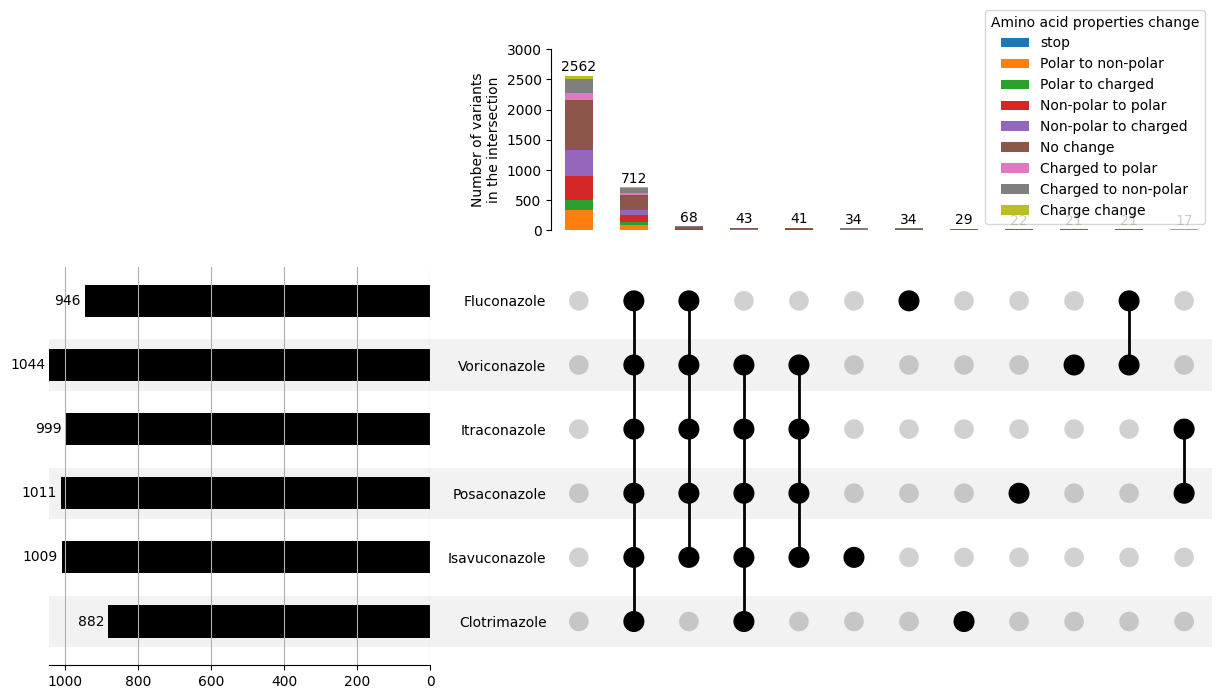

In [18]:
#to do an upset:(plot
from upsetplot import from_indicators
from upsetplot import UpSet
from upsetplot import generate_counts
from upsetplot import plot


# Create a boolean condition to filter rows where 'aa' is not equal to 'aa_WT'
condition = df_upset['aa'] != df_upset['aa_WT']
df_upset = df_upset[condition]

anti = ["Fluconazole","Voriconazole","Itraconazole","Posaconazole", "Isavuconazole","Clotrimazole"]

pal = sns.color_palette(["#989898","#6C44A6","#CB3367","#F0D90D","#CFCFCE"], n_colors=5)

fig = plt.figure(figsize=(15, 8))
upset_obj = UpSet(from_indicators(anti, data=df_upset),
                   #show_percentages=True,
                   show_counts=True,
                   min_subset_size=15,
                   sort_by='cardinality',
                   sort_categories_by="-input",
                   element_size=None,
                   intersection_plot_elements=0, # height of intersection barplot in matrix elements # needs to be 0 to be able to draw stacked_barplot
                   totals_plot_elements = 7 # width of totals barplot in matrix elements
                  )

upset_obj.add_stacked_bars(by='comparison_result'
                          )



d = upset_obj.plot(fig=fig) # Assigns all plots to a dictionary containing axes subplots - same keys as gridspec returned by upset_obj.make_grid()
ax0 = d['extra0'] # Key corresponding to stacked barplot ('intersections' = intersection barplot)


ax0.set_ylabel('Number of variants\nin the intersection') 

ax0.grid(False)


ax0.set_ylim(0, 3000)


ax0.legend(title="Amino acid properties change")


plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('upsetplot_resistance_overlap_pval_0.01.svg', format='svg', dpi=300)
plt.savefig('upsetplot_resistance_overlap_pval_0.01.png', format='png', dpi=300)

In [19]:
# Assuming df_upset is your DataFrame with the specified columns
# ...

# Create a boolean condition to filter rows where 'aa' is not equal to 'aa_WT'
condition = df_upset['aa'] != df_upset['aa_WT']
df_upset = df_upset[condition]

# Create a dictionary to store unique intersections and assign a number to each
intersection_dict = {}

def get_intersection(row):
    intersection = tuple(row[['Fluconazole', 'Itraconazole', 'Voriconazole', 'Posaconazole', 'Isavuconazole', 'Clotrimazole']])
    if intersection not in intersection_dict:
        intersection_dict[intersection] = len(intersection_dict)
    return intersection_dict[intersection]

# Apply the function to create the 'Intersection' column
df_upset['Intersection'] = df_upset.apply(lambda row: get_intersection(row), axis=1)

# Count the occurrences of each intersection
intersection_counts = df_upset['Intersection'].value_counts()

# Display the counts
print("Intersection counts:")
print(intersection_counts)

# Display the resulting DataFrame
print("\nDataFrame with 'Intersection' column:")
df_upset


Intersection counts:
0     2562
5      712
21      68
11      43
12      41
16      34
24      34
2       29
6       22
38      21
32      21
10      17
37      14
17      14
18      11
29      11
13       9
42       9
27       9
41       8
28       8
15       7
55       7
46       7
26       6
43       6
4        6
58       5
7        5
47       5
20       5
8        5
22       4
1        4
31       4
53       4
48       4
45       4
3        4
40       4
23       4
19       3
25       3
14       3
34       3
30       3
9        3
39       2
44       2
56       2
36       1
35       1
49       1
50       1
51       1
52       1
33       1
54       1
57       1
Name: Intersection, dtype: int64

DataFrame with 'Intersection' column:


,position,aa,No antifungal,Fluconazole,Itraconazole,Voriconazole,Posaconazole,Isavuconazole,Clotrimazole,aa_prop,aa_WT,aa_prop_WT,prop_change,comparison_result,Intersection
0,55,*,False,False,False,False,False,False,False,stop,I,non-polar,non-polar to stop,stop,0
1,55,A,False,False,False,False,False,False,False,non-polar,I,non-polar,non-polar to non-polar,No change,0
2,55,C,False,False,False,False,False,False,False,non-polar,I,non-polar,non-polar to non-polar,No change,0
3,55,D,False,False,False,False,False,False,False,- charge,I,non-polar,non-polar to - charge,Non-polar to charged,0
4,55,E,False,False,False,False,False,False,False,- charge,I,non-polar,non-polar to - charge,Non-polar to charged,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4017,511,S,False,True,True,True,True,True,True,polar,L,non-polar,non-polar to polar,Non-polar to polar,5
4018,511,T,False,False,False,False,False,False,False,polar,L,non-polar,non-polar to polar,Non-polar to polar,0
4019,511,V,False,False,False,True,False,True,False,non-polar,L,non-polar,non-polar to non-polar,No change,37
4020,511,W,False,False,False,False,False,False,True,non-polar,L,non-polar,non-polar to non-polar,No change,2


In [21]:

# Create a boolean condition to filter rows where 'aa' is not equal to 'aa_WT'
condition = df_upset['aa'] != df_upset['aa_WT']
df_upset = df_upset[condition]

# Filter rows where all the result columns are equal to "deleterious"
not_df_upset = df_upset[(df_upset[["Fluconazole","Voriconazole","Itraconazole","Posaconazole", "Isavuconazole","Clotrimazole"]] == False).all(axis=1)]

# Filter rows where all the result columns are equal to "resistant"
resistant_df_upset = df_upset[(df_upset[["Fluconazole","Voriconazole","Itraconazole","Posaconazole", "Isavuconazole","Clotrimazole"]] == True).all(axis=1)]

# Calculate the percentage of each comparison_result for deleterious cases
not_percentage = not_df_upset['comparison_result'].value_counts(normalize=True) * 100

# Calculate the percentage of each comparison_result for resistant cases
resistant_percentage = resistant_df_upset['comparison_result'].value_counts(normalize=True) * 100

In [24]:
df_wide

,position,aa,select_coef_None,select_coef_Fluco,select_coef_Itra,select_coef_Vorico,select_coef_Posaco,select_coef_Isa,select_coef_Clotri,adjusted_p_value_None,...,result_Itra,result_Vorico,result_Posaco,result_Isa,result_Clotri,aa_prop,aa_WT,aa_prop_WT,prop_change,comparison_result
0,55,*,-0.528211,-0.635982,-0.395863,-0.436730,-0.456467,-0.469618,-0.500341,8.053801e-209,...,deleterious,deleterious,deleterious,deleterious,deleterious,stop,I,non-polar,non-polar to stop,stop
1,55,A,-0.004103,-0.103453,-0.065143,-0.033326,-0.025771,-0.029091,-0.067066,8.869498e-01,...,deleterious,deleterious,wt like,deleterious,deleterious,non-polar,I,non-polar,non-polar to non-polar,No change
2,55,C,-0.009924,-0.080846,-0.063481,-0.030449,-0.059051,-0.027665,-0.080726,5.661675e-01,...,deleterious,wt like,deleterious,deleterious,deleterious,non-polar,I,non-polar,non-polar to non-polar,No change
3,55,D,-0.057636,-0.706814,-0.481650,-0.545815,-0.349018,-0.373303,-0.537737,4.824697e-10,...,deleterious,deleterious,deleterious,deleterious,deleterious,- charge,I,non-polar,non-polar to - charge,Non-polar to charged
4,55,E,-0.014590,-0.610011,-0.393626,-0.432500,-0.351371,-0.363802,-0.407222,9.943499e-02,...,deleterious,deleterious,deleterious,deleterious,deleterious,- charge,I,non-polar,non-polar to - charge,Non-polar to charged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4017,511,S,-0.027139,0.070603,0.089482,0.127737,0.127347,0.049544,0.075024,6.210924e-03,...,advantageous,advantageous,advantageous,advantageous,advantageous,polar,L,non-polar,non-polar to polar,Non-polar to polar
4018,511,T,-0.021492,-0.178867,-0.093856,-0.024916,-0.095493,0.005901,-0.135075,1.635361e-02,...,deleterious,wt like,deleterious,wt like,deleterious,polar,L,non-polar,non-polar to polar,Non-polar to polar
4019,511,V,-0.008682,-0.016039,-0.075843,0.059025,-0.068628,0.034597,0.058365,5.618751e-01,...,deleterious,advantageous,deleterious,advantageous,wt like,non-polar,L,non-polar,non-polar to non-polar,No change
4020,511,W,-0.042223,-0.092103,-0.227904,0.018303,-0.210768,-0.000725,0.093816,3.861880e-02,...,deleterious,wt like,deleterious,wt like,advantageous,non-polar,L,non-polar,non-polar to non-polar,No change


In [25]:

df_wide['comparison_result'] = df_wide.apply(compare_columns, axis=1)


# Create a boolean condition to filter rows where 'aa' is not equal to 'aa_WT'
condition = df_wide['aa'] != df_wide['aa_WT']
df_wide = df_wide[condition]

# Filter rows where all the result columns are equal to "wt like"
wt_df_wide = df_wide[(df_wide[["result_Fluco","result_Vorico","result_Itra","result_Posaco", "result_Isa","result_Clotri"]] == "wt like").all(axis=1)]

# Filter rows where all the result columns are equal to "resistant"
res_df_wide = df_wide[(df_wide[["result_Fluco","result_Vorico","result_Itra","result_Posaco", "result_Isa","result_Clotri"]] == "advantageous").all(axis=1)]

# Filter rows where all the result columns are equal to "deleterious"
dele_df_wide = df_wide[(df_wide[["result_Fluco","result_Vorico","result_Itra","result_Posaco", "result_Isa","result_Clotri"]] == "deleterious").all(axis=1)]

# Calculate the percentage of each comparison_result for deleterious cases
del_percentage = dele_df_wide['comparison_result'].value_counts(normalize=True) * 100

# Calculate the percentage of each comparison_result for resistant cases
res_percentage = res_df_wide['comparison_result'].value_counts(normalize=True) * 100

# Calculate the percentage of each comparison_result for resistant cases
wt_percentage = wt_df_wide['comparison_result'].value_counts(normalize=True) * 100

In [26]:
del_percentage

No change               32.032668
Non-polar to charged    17.967332
Non-polar to polar      16.016334
Polar to non-polar      11.615245
Charged to non-polar     9.210526
Polar to charged         6.442831
Charged to polar         4.038113
Charge change            2.177858
stop                     0.499093
Name: comparison_result, dtype: float64

In [27]:
import scipy.stats as stats

# Create dataframes from the percentages
dele_percentage_df = del_percentage.to_frame(name='deleterious_percentage')
res_percentage_df = res_percentage.to_frame(name='resistant_percentage')
wt_percentage_df = wt_percentage.to_frame(name='wt_percentage')


# Merge the two dataframes
combined_df_dele = dele_percentage_df.merge(res_percentage_df, left_index=True, right_index=True)
combined_df_wt = wt_percentage_df.merge(res_percentage_df, left_index=True, right_index=True, how='right')
combined_df_wt = combined_df_wt.fillna(0)
# Perform a Chi-Square test
chi2, p, _, _ = stats.chi2_contingency(combined_df_wt)

alpha = 0.05
if p < alpha:
    print("The differences in wt_percentage and resistant_percentage are statistically significant.")
    print(str(p))
else:
    print("There is no statistically significant difference between wt_percentage and resistant_percentage.")
    print(str(p))
    
    # Perform a Chi-Square test
chi2, p, _, _ = stats.chi2_contingency(combined_df_dele)

alpha = 0.05
if p < alpha:
    print("The differences in dele_percentage and resistant_percentage are statistically significant.")
    print(str(p))
else:
    print("There is no statistically significant difference between dele_percentage and resistant_percentage.")
    print(str(p))

The differences in wt_percentage and resistant_percentage are statistically significant.
0.00027477037974772526
There is no statistically significant difference between dele_percentage and resistant_percentage.
0.9669720293932521


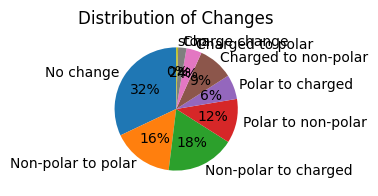

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

categories_order = [
    'No change', 'Non-polar to polar', 'Non-polar to charged', 'Polar to non-polar',
    'Polar to charged', 'Charged to non-polar', 'Charged to polar', 'Charge change',"stop"
]

dele_percentage_df = dele_percentage_df.reindex(index=categories_order)

# Plot a pie chart
plt.figure(figsize=(2, 2))
plt.pie(dele_percentage_df['deleterious_percentage'], labels=dele_percentage_df.index, autopct='%.0f%%', startangle=90)
plt.title('Distribution of Changes')
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('piechart_del.svg', format='svg', dpi=300)
plt.show()


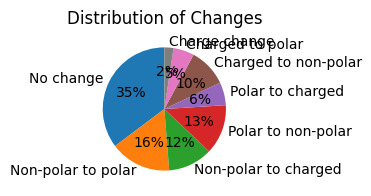

In [30]:
# Plot a pie chart
plt.figure(figsize=(2, 2))

categories_order = [
    'No change', 'Non-polar to polar', 'Non-polar to charged', 'Polar to non-polar',
    'Polar to charged', 'Charged to non-polar', 'Charged to polar', 'Charge change'
]

res_percentage_df = res_percentage_df.reindex(index=categories_order)
plt.pie(res_percentage_df['resistant_percentage'], labels=res_percentage_df.index, autopct='%.0f%%', startangle=90)
plt.title('Distribution of Changes')
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('piechart_res.svg', format='svg', dpi=300)

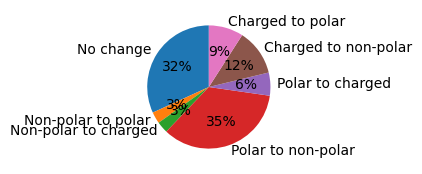

In [31]:
# Plot a pie chart
plt.figure(figsize=(2, 2))
categories_order = [
    'No change', 'Non-polar to polar', 'Non-polar to charged', 'Polar to non-polar',
    'Polar to charged', 'Charged to non-polar', 'Charged to polar'
]

wt_percentage_df = wt_percentage_df.reindex(index=categories_order)
plt.pie(wt_percentage_df['wt_percentage'], labels=wt_percentage_df.index, autopct='%.0f%%', startangle=90)
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('piechart_wt.svg', format='svg', dpi=300)